In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

Melakukan import modul yang akan digunakan, diantaranya Matplotlib untuk visualisasi data, dan fungsi-fungsi dari SciPy untuk pemrosesan sinyal. Selain itu, dilakukan juga konfigurasi font pada beberapa komponen dala keperluan plot

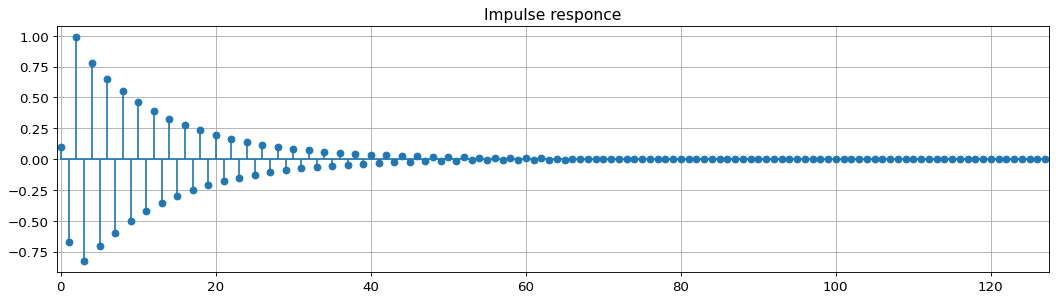

In [ ]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(16, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Code diatas menampilkan plot  respons impuls dari sistem filter IIR yang didefinisikan oleh koefisien b dan a. Sebuah delta-function (impuls) diinputkan ke sistem filter menggunakan fungsi lfilter dari SciPy, yang menghasilkan respon impuls y1. Plot menggunakan Matplotlib untuk menampilkan respon impuls ini dengan menggunakan fungsi stem, menunjukkan amplitudo dari sinyal output pada titik-titik diskrit.

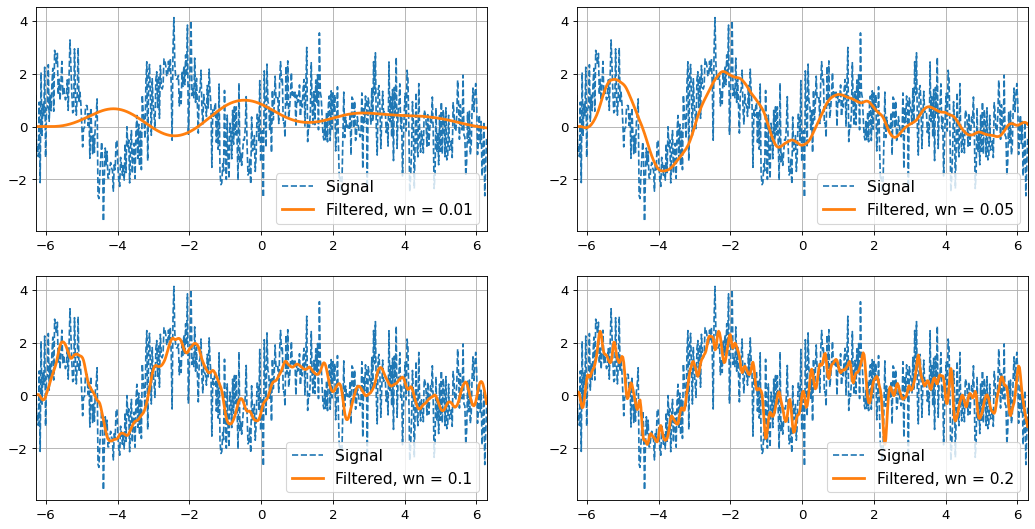

In [ ]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')

Code diatas menghasilkan empat plot berbeda yang berasal dari kalkulasi filter IIR. Perhitungan pada code diatas menghasilkan sinyal input x yang merupakan kombinasi dari dua gelombang sinusoidal yang saling berselang-seling dengan beberapa white noise yang ditambahkan. Kemudian, sinyal input tersebut disaring menggunakan filter low-pass Butterworth orde 3 dengan frekuensi cut-off sebesar 0.2 kali frekuensi Nyquist. Filter tersebut diaplikasikan pada sinyal asli dan hasilnya ditampilkan dalam empat subplot tersebut, dengan setiap subplot mewakili hasil sinyal yang disaring menggunakan filter Butterworth dengan frekuensi cut-off yang berbeda. Plot menunjukkan sinyal asli (biru) dan hasil sinyal yang telah disaring (orange) untuk setiap filter dengan frekuensi cut-off yang berbeda, memperlihatkan efek dari filtering  pada sinyal input yang kompleks.

In [ ]:
N = 40
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

Code diatas menguji perbedaan antara hasil dari pendekatan yang berbeda dalam mengimplementasikan filter FIR dan IIR. Pertama, sebuah delta-function (impuls) diterapkan ke filter FIR dengan menggunakan koefisien b yang diisi dengan nilai satu dan koefisien a yang merupakan array satu. Kemudian, pendekatan kedua mengubah filter IIR menjadi bentuk rekursif dengan menetapkan koefisien b menjadi array yang berisi nilai satu pada indeks pertama dan nilai minus satu pada indeks terakhir, sementara koefisien a diisi dengan nilai satu dan minus satu. Hasil dari kedua pendekatan tersebut, y1 dan y2, dibandingkan untuk memverifikasi apakah keduanya menghasilkan sinyal yang sama. Hasil yang didapatkan adalah True